In [4]:
%pip install numpy matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 16.0 MB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 17.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [14]:
%pip install notebook jupyterlab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 20.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 22.2 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 17.9 MB/s eta 0:00:00 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [24]:
%pip install --upgrade nbformat

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

def load_all_models_and_visualize(save_dir):
    """Load all models from a directory and visualize their weights."""
    
    # Ensure the directory exists
    if not os.path.exists(save_dir):
        print(f"Directory {save_dir} not found!")
        return
    
    # List all .pth files in the directory
    model_files = [f for f in os.listdir(save_dir) if f.endswith(".pth")]
    
    if not model_files:
        print("No model files found in the directory.")
        return

    colors = ["red", "white", "green"]
    n_bins = 100
    cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=n_bins)

    # Extract weight matrices for visualization
    def extract_weights(state_dict):
        """Extract first few weight layers as numpy arrays"""
        weights = []
        for key, value in state_dict.items():
            if "weight" in key:
                weights.append(value.cpu().numpy())
        return weights

    # Function to plot weight heatmaps
    def plot_weight_heatmaps(weights, title_prefix):
        """Plot heatmaps of weight matrices"""
        num_layers = len(weights)
        fig, axes = plt.subplots(1, num_layers, figsize=(5 * num_layers, 5))

        if num_layers == 1:
            axes = [axes]  # Ensure axes is iterable

        for i, (w, ax) in enumerate(zip(weights, axes)):
            cax = ax.imshow(w, cmap=cmap, vmin=-2, vmax=2, aspect='auto')
            ax.set_title(f"Layer {i+1}")
            ax.set_xlabel("Neuron Index")
            ax.set_ylabel("Neuron Index")
        
        fig.colorbar(cax, ax=axes, orientation="vertical", fraction=0.05)
        plt.show()

    # Load and visualize each model
    for model_file in model_files:
        model_path = os.path.join(save_dir, model_file)
        
        # Load model
        checkpoint = torch.load(model_path, map_location=torch.device("cpu"))
        print(f"\nLoaded experiment from {model_path}")

        # Extract stored information
        student_model_state_dict = checkpoint["student_model_state_dict"]
        student_weights = extract_weights(student_model_state_dict)

        print(f"Visualizing Student Model Weights for {model_file}")
        plot_weight_heatmaps(student_weights, f"Student - {model_file}")


Loaded experiment from /Users/laura/Documents/MIT/Semesterproject/investigating_sparseNN/experiment_output/experiments_davide_lr0.01_b16_init/nonoverlappingCNN_sigmoid__fcnn_sigmoid.pth
Visualizing Student Model Weights for nonoverlappingCNN_sigmoid__fcnn_sigmoid.pth


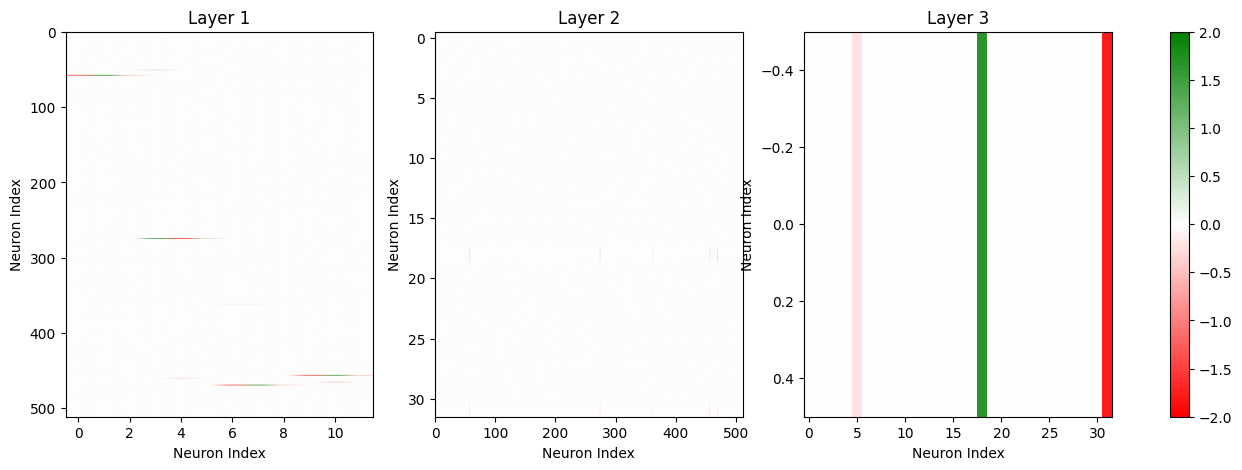


Loaded experiment from /Users/laura/Documents/MIT/Semesterproject/investigating_sparseNN/experiment_output/experiments_davide_lr0.01_b16_init/nonoverlappingCNN_tanh__fcnn_tanh.pth
Visualizing Student Model Weights for nonoverlappingCNN_tanh__fcnn_tanh.pth


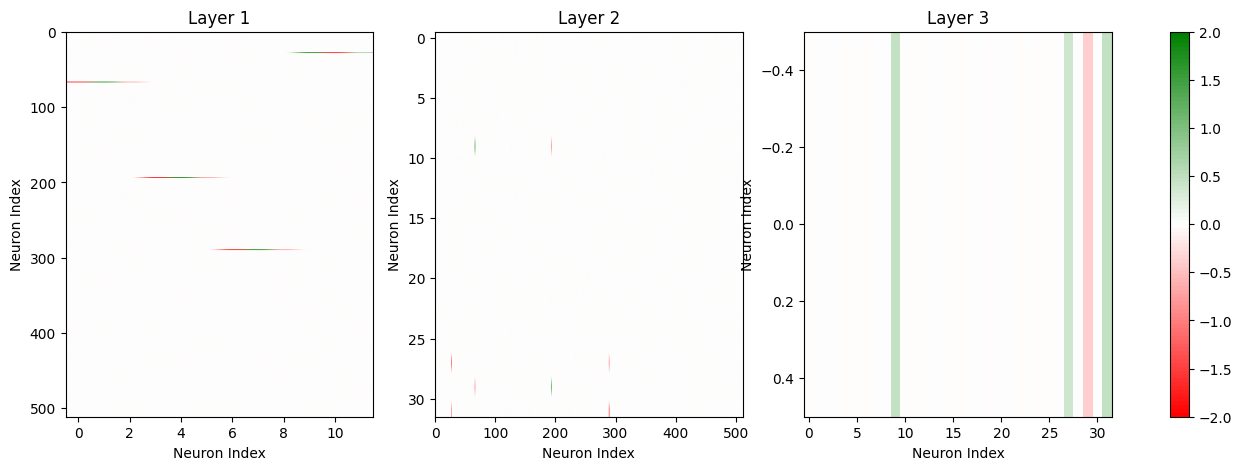


Loaded experiment from /Users/laura/Documents/MIT/Semesterproject/investigating_sparseNN/experiment_output/experiments_davide_lr0.01_b16_init/nonoverlappingCNN_relu__fcnn_relu.pth
Visualizing Student Model Weights for nonoverlappingCNN_relu__fcnn_relu.pth


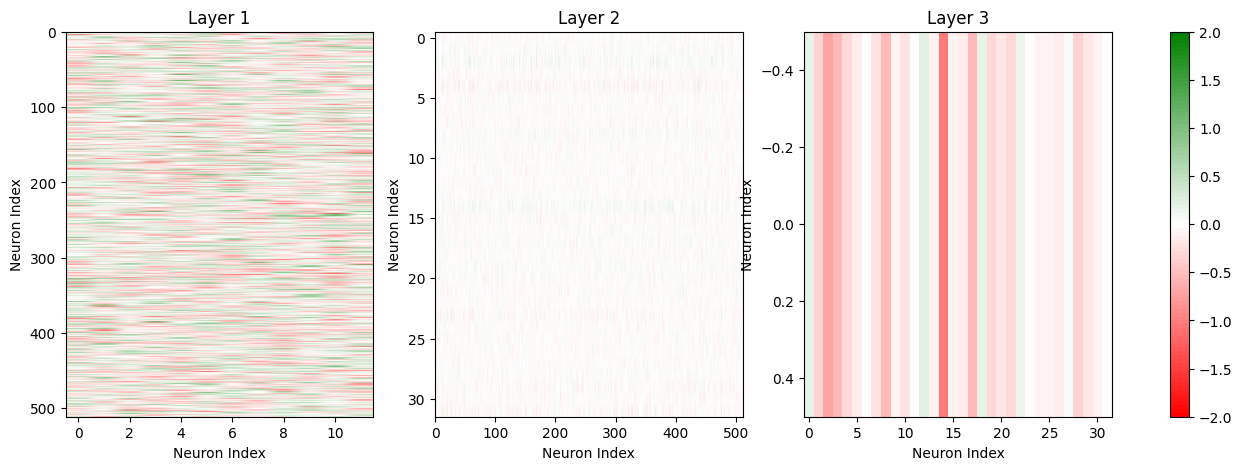

In [27]:
save_directory = "/Users/laura/Documents/MIT/Semesterproject/investigating_sparseNN/experiment_output/experiments_davide_lr0.01_b16_init"  # Update this path
load_all_models_and_visualize(save_directory)


Loaded experiment from /Users/laura/Documents/MIT/Semesterproject/investigating_sparseNN/experiment_output/experiments_18032025/nonoverlappingCNN_sigmoid__fcnn_sigmoid.pth
Visualizing Student Model Weights for nonoverlappingCNN_sigmoid__fcnn_sigmoid.pth


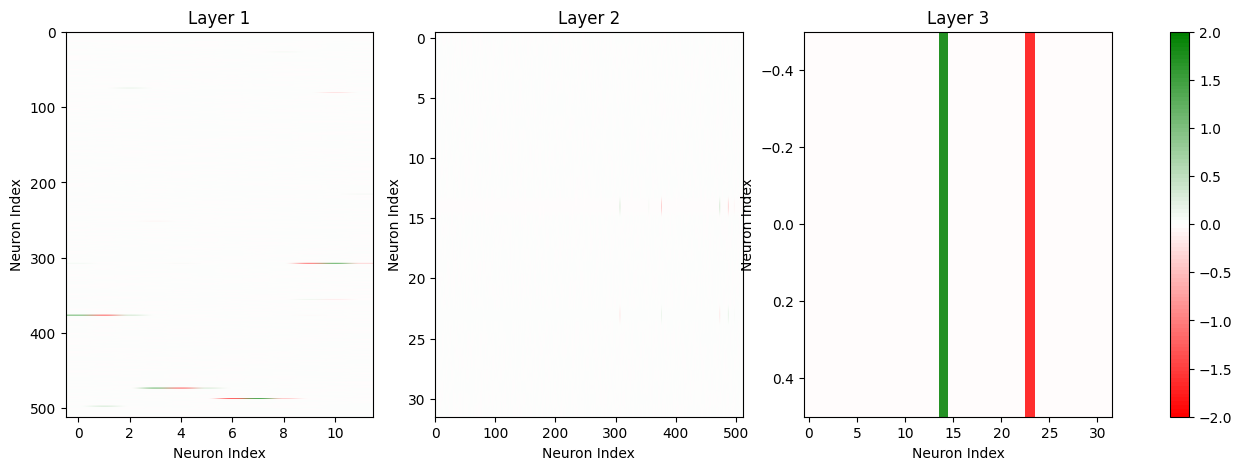


Loaded experiment from /Users/laura/Documents/MIT/Semesterproject/investigating_sparseNN/experiment_output/experiments_18032025/nonoverlappingCNN_tanh__fcnn_tanh.pth
Visualizing Student Model Weights for nonoverlappingCNN_tanh__fcnn_tanh.pth


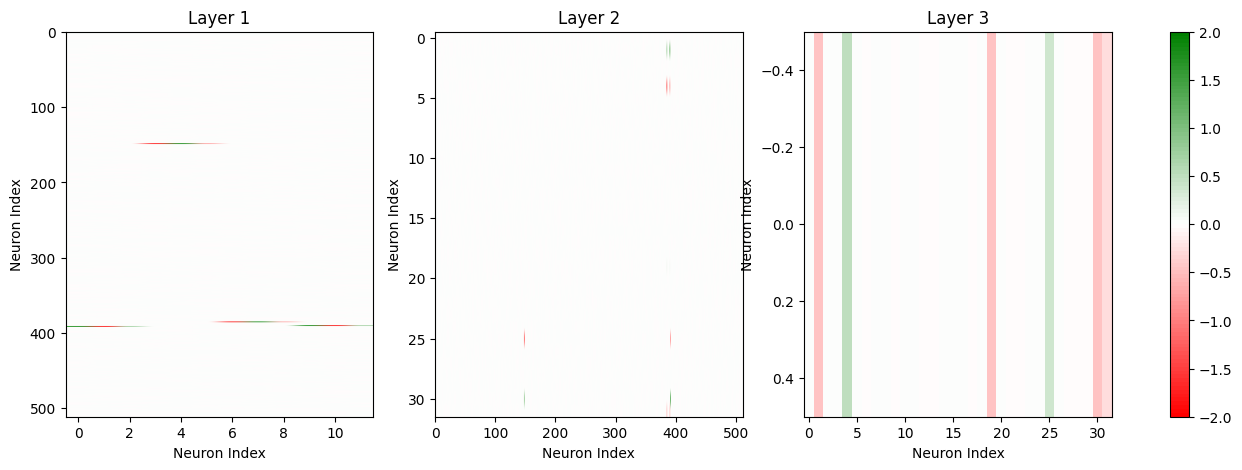


Loaded experiment from /Users/laura/Documents/MIT/Semesterproject/investigating_sparseNN/experiment_output/experiments_18032025/nonoverlappingCNN_relu__fcnn_relu.pth
Visualizing Student Model Weights for nonoverlappingCNN_relu__fcnn_relu.pth


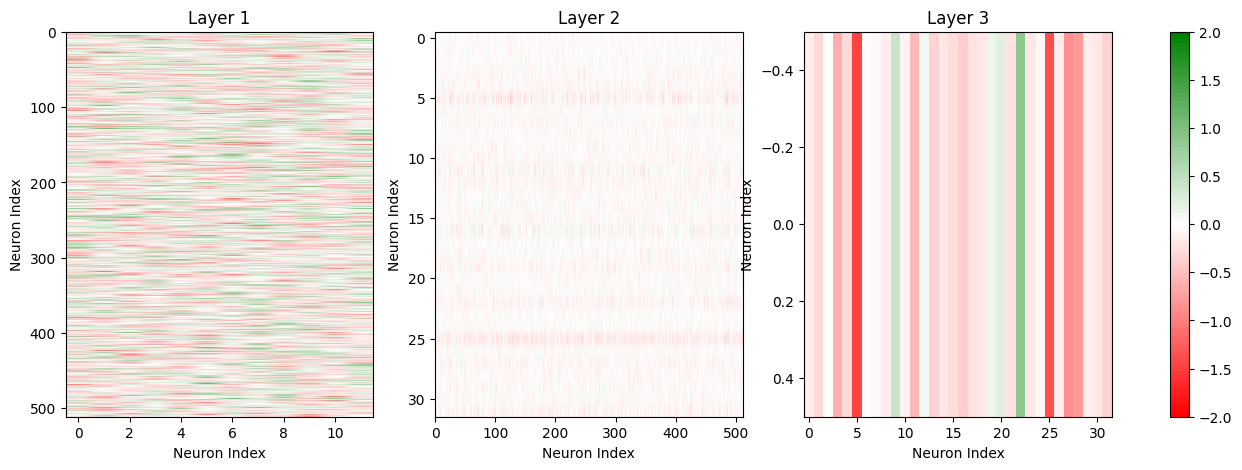

In [11]:
save_directory = "/Users/laura/Documents/MIT/Semesterproject/investigating_sparseNN/experiment_output/experiments_18032025"
load_all_models_and_visualize(save_directory)